In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('abalone.csv')  # read the data
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)

print(data.isna().sum())

#printing the summary of data type
data.info() 

(4177, 9)
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)

print(data.shape)

(4177, 9)


In [5]:
# Lets create AGE in years column as per given information age=ring+1.5
data['Age']=data['Rings']+1.5

In [6]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000


In [7]:
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
df=label.fit_transform(data["Sex"]) 
pd.Series(df)
data["Sex"]=df

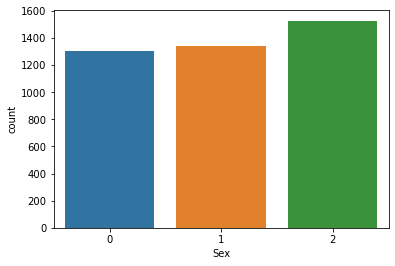

In [8]:
#plot each class frequency
sns.countplot(x='Sex',data=data)
plt.show()

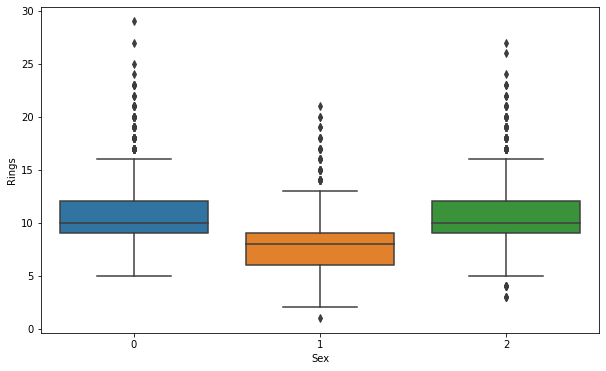

In [9]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.boxplot(y ='Rings', x ='Sex', data = data)
plt.show()

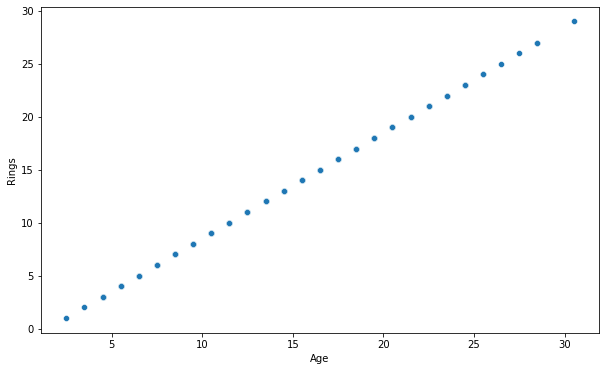

In [10]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.scatterplot(y ='Rings', x ='Age', data = data)
plt.show()

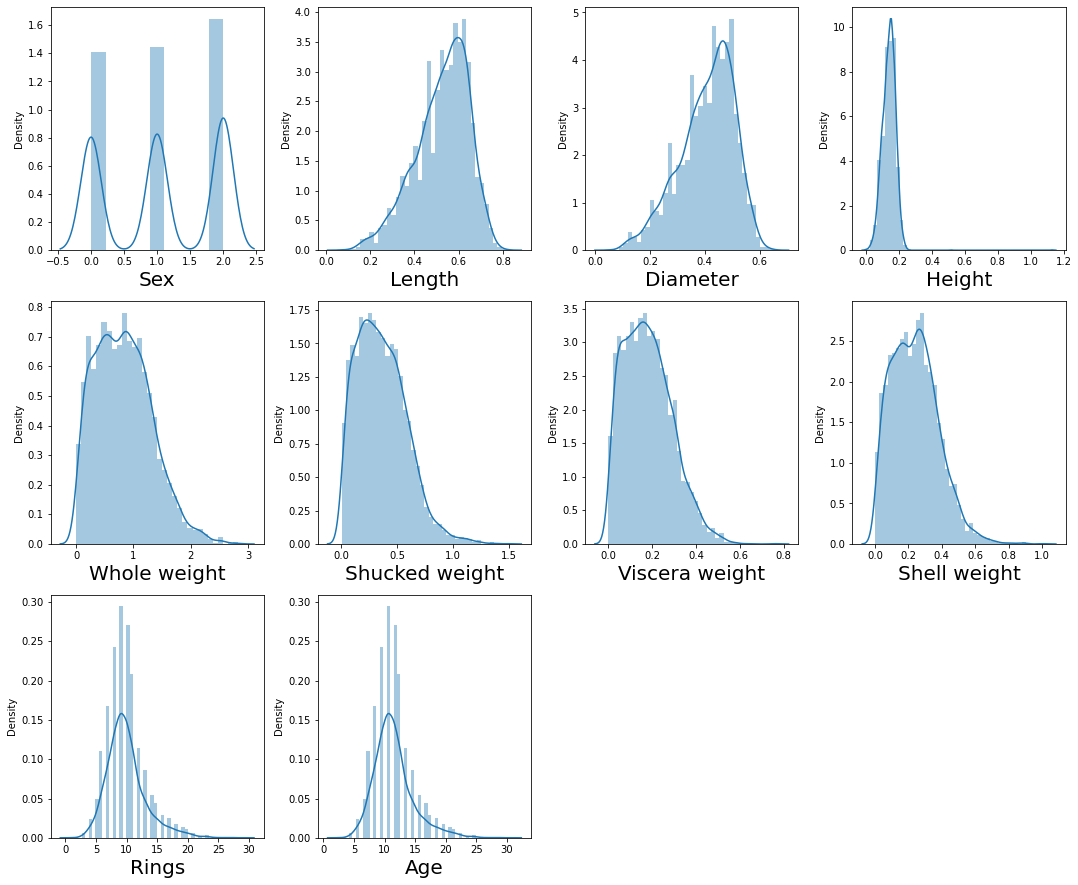

In [12]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column],)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [13]:
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

In [14]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.63821689, 1.57154357,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.21298732, 0.91001299,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.20713907, 0.28962385,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.49695471, 0.28962385,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.41073914, 0.02057072,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.84048058, 0.64095986,
        0.64095986]])

In [15]:
threshold=3
print(np.where(z>3))

(array([   6,    6,   72,   72,   81,   83,   83,  129,  163,  164,  165,
        165,  165,  166,  166,  166,  167,  167,  168,  170,  181,  181,
        232,  232,  236,  236,  236,  237,  237,  238,  238,  239,  270,
        270,  275,  275,  277,  278,  278,  294,  294,  310,  310,  313,
        313,  314,  314,  334,  351,  351,  355,  355,  358,  358,  362,
        362,  375,  375,  416,  416,  417,  417,  428,  428,  431,  431,
        433,  433,  469,  469,  478,  478,  480,  480,  501,  501,  526,
        526,  530,  530,  572,  572,  628,  628,  673,  673,  674,  674,
        675,  675,  678,  678,  694,  696,  696,  719,  719,  720,  720,
        744,  744,  754,  754,  756,  756,  811,  811,  891,  891,  891,
       1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1206,
       1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418, 1422,
       1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756, 1757,
       1759, 1761, 1762, 1762, 1762, 1763, 1763, 1

In [16]:
df=data[(z<3).all(axis=1)]

In [17]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [18]:
df.shape

(4027, 10)

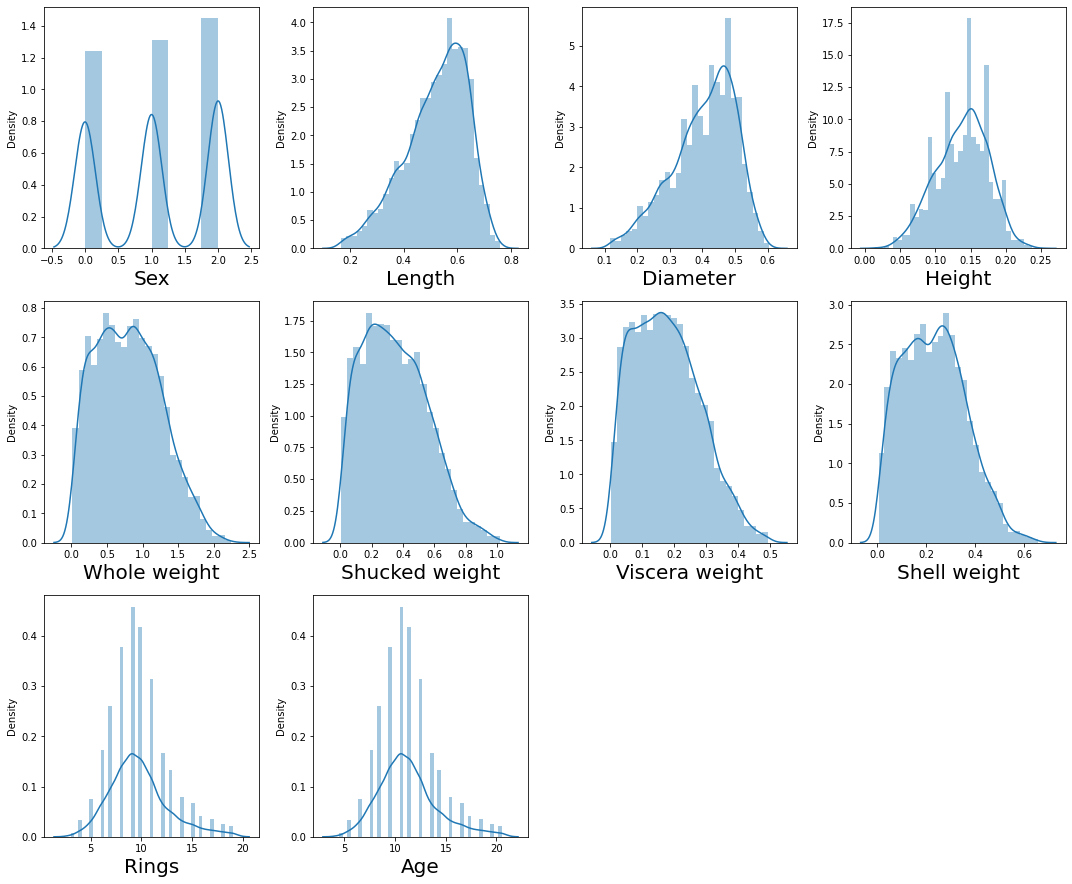

In [20]:
# Distribution after removing outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

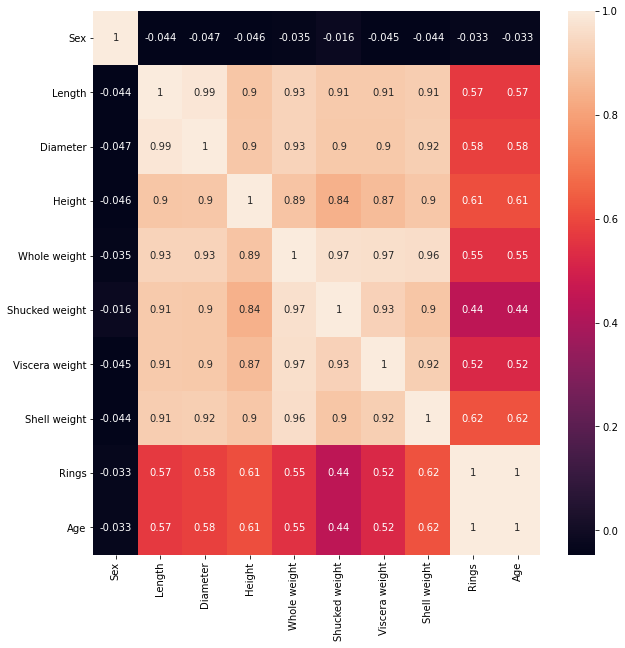

In [21]:
# lets check multicolinearity
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

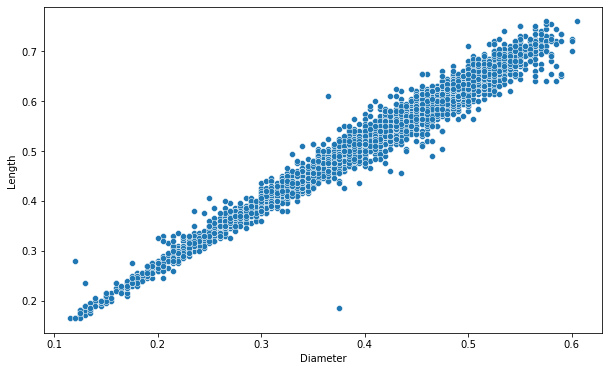

In [22]:
# From above heatmap it is clear that Length and diameter has almost linear relation (0.99) s0 lets check and remove one of them 
plt.figure(figsize =(10, 6))
sns.scatterplot(y ='Length', x ='Diameter', data = df)
plt.show()

In [23]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=df.drop(columns=['Rings','Length'])
y=df['Rings']

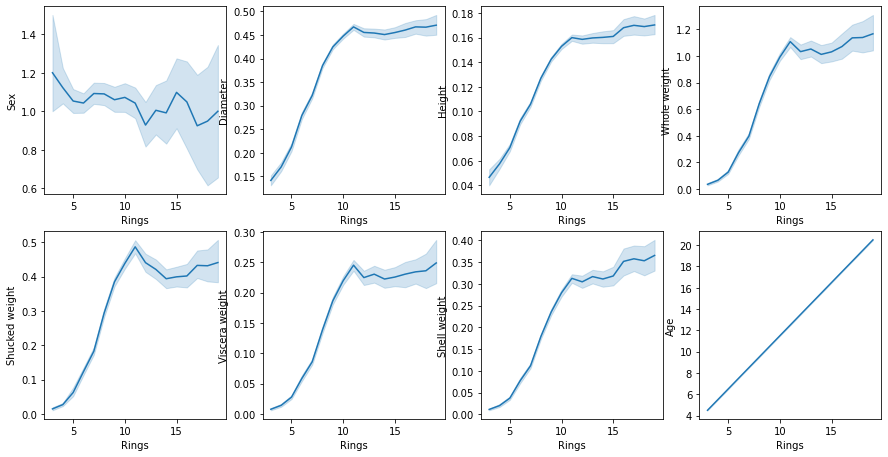

In [24]:
# see how featurs r related to lable(Graphical Univariate Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

In [25]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

Text(0.5, 1.0, 'PCA')

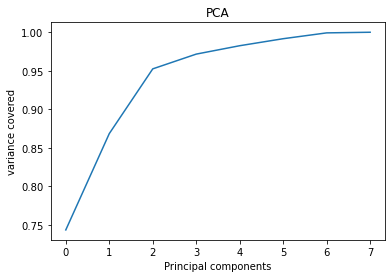

In [26]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal components')
plt.ylabel("variance covered")
plt.title("PCA")

In [27]:
pca=PCA(n_components=5)
new_comp=pca.fit_transform(x_scaled)
pri_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5'])
pri_comp

,PC1,PC2,PC3,PC4,PC5
0,-1.175550,-1.071580,2.101271,0.883689,0.430367
1,-3.317946,-1.097513,-0.066988,0.081961,-0.159144
2,-0.492419,1.302780,-0.066172,-0.307659,0.264499
3,-1.275324,-1.112070,0.523500,-0.155142,0.067833
4,-3.556434,0.126690,-0.087590,0.290864,-0.101626
...,...,...,...,...,...
4022,1.020133,1.283597,0.206611,-0.328605,-0.119164
4023,0.665174,-1.184335,-0.141310,0.325561,0.161943
4024,2.220760,-1.220122,-0.701907,-0.937614,-0.480590
4025,1.630074,1.230563,-0.492603,0.269569,0.236174


# Now lets Build the model to predict Rings

In [28]:
from sklearn.ensemble import RandomForestRegressor

rand_regressor= RandomForestRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(pri_comp,y,test_size=0.30,random_state=i)
    rand_regressor.fit(x_train,y_train)
    y_pred=rand_regressor.predict(x_train)
    pred=rand_regressor.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {r2_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {r2_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.9990950785293419
at random sate 0, the training accuracy is:- 0.9934942698149107


at random sate 1, the training accuracy is:- 0.9990517047936135
at random sate 1, the training accuracy is:- 0.9946392358057528


at random sate 2, the training accuracy is:- 0.9991000926325698
at random sate 2, the training accuracy is:- 0.9925158038380164


at random sate 3, the training accuracy is:- 0.9991764625603464
at random sate 3, the training accuracy is:- 0.9926499105674497


at random sate 4, the training accuracy is:- 0.9990760215276657
at random sate 4, the training accuracy is:- 0.9927738289383196


at random sate 5, the training accuracy is:- 0.9990288026861124
at random sate 5, the training accuracy is:- 0.9938913861084313


at random sate 6, the training accuracy is:- 0.9991186277562714
at random sate 6, the training accuracy is:- 0.9935580587088804


at random sate 7, the training accuracy is:- 0.9991275921380216
at random sate 7, the trai

at random sate 63, the training accuracy is:- 0.9990958356033445
at random sate 63, the training accuracy is:- 0.9944492162194704


at random sate 64, the training accuracy is:- 0.9990692313046298
at random sate 64, the training accuracy is:- 0.9930719265202687


at random sate 65, the training accuracy is:- 0.9990553885487966
at random sate 65, the training accuracy is:- 0.9937249249399095


at random sate 66, the training accuracy is:- 0.9990833925310391
at random sate 66, the training accuracy is:- 0.9933056018028481


at random sate 67, the training accuracy is:- 0.9990915232367908
at random sate 67, the training accuracy is:- 0.9923711365304547


at random sate 68, the training accuracy is:- 0.999143785061596
at random sate 68, the training accuracy is:- 0.9932582401606103


at random sate 69, the training accuracy is:- 0.9990960276195288
at random sate 69, the training accuracy is:- 0.99460378259196


at random sate 70, the training accuracy is:- 0.9990446648637906
at random sate

In [29]:
#Split data into train & test by using this new fetures (pri_comp)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=70)

In [30]:
def print_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",r2_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",r2_score(y_test,pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
        print("MAE:",mean_absolute_error(y_test,pred))
        print("MSE:",mean_squared_error(y_test,pred))

In [31]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.

from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [32]:
# Model no.1
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

lcv=LassoCV(alphas=None,max_iter=10000,normalize=True)
lcv.fit(x_train,y_train)
alpha=lcv.alpha_
print(alpha)
Lasso_reg=Lasso(alpha).fit(x_train,y_train)

print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=True)
print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=False)
model_accuracy(Lasso_reg)

5.342878161004281e-05
Train Report: 0.9999999131845856
Test Report: 0.999999913955971
RMSE: 0.0008586114009106263
MAE: 0.0005455884710456641
MSE: 7.372135377737084e-07
Accuracy: 100.00 %
Standard Deviation: 0.00 %


In [33]:
# Model no.2
from sklearn.ensemble import RandomForestRegressor

rand_regressor= RandomForestRegressor()
rand_regressor.fit(x_train,y_train)

print_score(rand_regressor,x_train,x_test,y_train,y_test,train=True)
print_score(rand_regressor,x_train,x_test,y_train,y_test,train=False)
model_accuracy(rand_regressor)

Train Report: 0.999999982354764
Test Report: 0.9999999324229584
RMSE: 0.000760914516599284
MAE: 5.789909015715344e-05
MSE: 5.78990901571522e-07
Accuracy: 99.98 %
Standard Deviation: 0.02 %


In [34]:
# Model no.3
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9999999998130445
Test Report: 0.9999999997649641
RMSE: 4.48748856476853e-05
MAE: 2.1678934026296913e-05
MSE: 2.0137553618928323e-09
Accuracy: 99.95 %
Standard Deviation: 0.05 %


In [35]:
#Model no.4
from sklearn.ensemble import GradientBoostingRegressor

gbdt=GradientBoostingRegressor()

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.9999999977073489
Test Report: 0.9999999972730865
RMSE: 0.0001528522925208283
MAE: 9.367516816353606e-05
MSE: 2.3363823328872867e-08
Accuracy: 99.99 %
Standard Deviation: 0.01 %


In [36]:
#Model no.5
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test,train=True)
print_score(dt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 1.0
RMSE: 0.0
MAE: 0.0
MSE: 0.0
Accuracy: 99.96 %
Standard Deviation: 0.04 %


# Lokking at the all accuracy score and errors i m selecting DecisionTreeRegressor is best model 